In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import casadi as ca
from pytope import Polytope
from matplotlib.animation import FuncAnimation
from tqdm import tqdm

In [4]:
data_id = "08"
track_id  = 18

background_filepath = f"../../data/{data_id}_background.png"
recordingMeta_filepath = f"../../data/{data_id}_recordingMeta.csv"
tracks_filepath = f"../../data/{data_id}_tracks.csv"
tracksMeta_filepath = f"../../data/{data_id}_tracksMeta.csv"

tracks_data = pd.read_csv(tracks_filepath)
filtered_data = tracks_data[tracks_data['trackId'] == track_id]

xAcc = filtered_data['xAcceleration'].to_numpy()
yAcc = filtered_data['yAcceleration'].to_numpy()
acc_vals= np.vstack((xAcc,yAcc))
N_Sam = acc_vals.shape[1]

xPos = filtered_data["xCenter"].to_numpy()
yPos = filtered_data["yCenter"].to_numpy()
position_vals = np.vstack((xPos,yPos))

SV_x = xPos
SV_y = yPos

xVel = filtered_data["xVelocity"].to_numpy()
yVel = filtered_data["yVelocity"].to_numpy()
velocity_vals = np.vstack((xVel,yVel))

yaw = filtered_data["heading"].to_numpy()

recordingMeta = pd.read_csv(recordingMeta_filepath)
orthoPxToMeter = recordingMeta["orthoPxToMeter"].iloc[0]

vehicle_data = pd.read_csv(tracksMeta_filepath)
filtered_vehicle_param = vehicle_data[vehicle_data['trackId'] == track_id]
sv_width = filtered_vehicle_param["width"]
sv_length = filtered_vehicle_param["length"]

print(tracks_data[(tracks_data['trackId'] == track_id) & (tracks_data['trackLifetime'] == 0)]['xAcceleration'].to_numpy())

[-0.59471]


In [5]:
def gen_drive_area(vertices):
    Drive_Area = Polytope(vertices*(0.00814636091724916*12))
    Drive_Area_visual = Polytope(vertices)
    A_road = Drive_Area.A
    b_road = Drive_Area.b
    return Drive_Area, Drive_Area_visual, A_road, b_road

# EV 1
road_vertices_1 = np.array([
    [294, -59],
    [590, -388],
    [731, -221],
    [473, 88],
])

not_road_vertices_1 = [
    np.array([
        [303, -30],
        [548, -290],
        [701, -151],
        [473, 88]
     ]),
]

Drive_Area_1, Drive_Area_visual_1, A_road_1, b_road_1 = gen_drive_area(road_vertices_1)
not_Drive_Area_1 = []
not_Drive_Area_visual_1 = []
not_A_road_1 = []
not_b_road_1 = []
for i in range(len(not_road_vertices_1)):
    tmp1, tmp2, tmp3, tmp4 = gen_drive_area(not_road_vertices_1[i])
    not_Drive_Area_1.append(tmp1)
    not_Drive_Area_visual_1.append(tmp2)
    not_A_road_1.append(tmp3)
    not_b_road_1.append(tmp4)

# EV 2
# road_vertices_2 = np.array([
#     [306, -32],
#     [842, -623],
#     [877, -608],
#     [333, -4],
# ])

# not_road_vertices_2 = [
#     np.array([
#         [0, 1],
#         [1, 1],
#         [1, 0],
#         [0, 0]
#      ]),
# ]

road_vertices_2 = np.array([
    [850, -628],
    [549, -300],
    [381, -481],
    [654, -774],
])

not_road_vertices_2 = [
    np.array([
        [821, -639],
        [603, -400],
        [442, -543],
        [649, -759]
     ]),
]

Drive_Area_2, Drive_Area_visual_2, A_road_2, b_road_2 = gen_drive_area(road_vertices_2)
not_Drive_Area_2 = []
not_Drive_Area_visual_2 = []
not_A_road_2 = []
not_b_road_2 = []
for i in range(len(not_road_vertices_2)):
    tmp1, tmp2, tmp3, tmp4 = gen_drive_area(not_road_vertices_2[i])
    not_Drive_Area_2.append(tmp1)
    not_Drive_Area_visual_2.append(tmp2)
    not_A_road_2.append(tmp3)
    not_b_road_2.append(tmp4)

# EV 3
road_vertices_3 = np.array([
    [684, -152],
    [487, -318],
    [805, -670],
    [1000, -450],
])

not_road_vertices_3 = [
    np.array([
        [741, -200],
        [598, -387],
        [834, -649],
        [1000, -450]
     ]),
]

Drive_Area_3, Drive_Area_visual_3, A_road_3, b_road_3 = gen_drive_area(road_vertices_3)
not_Drive_Area_3 = []
not_Drive_Area_visual_3 = []
not_A_road_3 = []
not_b_road_3 = []
for i in range(len(not_road_vertices_3)):
    tmp1, tmp2, tmp3, tmp4 = gen_drive_area(not_road_vertices_3[i])
    not_Drive_Area_3.append(tmp1)
    not_Drive_Area_visual_3.append(tmp2)
    not_A_road_3.append(tmp3)
    not_b_road_3.append(tmp4)


road_vertices_4 = np.array([
    [455, -529],
    [651, -359],
    [340, -12],
    [100, -200],
])

not_road_vertices_4 = [
    np.array([
        [385, -457],
        [541, -291],
        [312, -40],
        [100, -200]
     ]),
]

Drive_Area_4, Drive_Area_visual_4, A_road_4, b_road_4 = gen_drive_area(road_vertices_4)
not_Drive_Area_4 = []
not_Drive_Area_visual_4 = []
not_A_road_4 = []
not_b_road_4 = []
for i in range(len(not_road_vertices_4)):
    tmp1, tmp2, tmp3, tmp4 = gen_drive_area(not_road_vertices_4[i])
    not_Drive_Area_4.append(tmp1)
    not_Drive_Area_visual_4.append(tmp2)
    not_A_road_4.append(tmp3)
    not_b_road_4.append(tmp4)

In [6]:
image_param = {
  "datasets": {
    "ind": {
      "scale_down_factor": 12,  
      "relevant_areas": { 
        "1": {
          "x_lim": [2000, 11500],  
          "y_lim": [9450, 0]  
        },
        "2": {
          "x_lim": [0, 12500],
          "y_lim": [7400, 0]
        },
        "3": {
          "x_lim": [0, 11500],
          "y_lim": [9365, 0]
        },
        "4": {
          "x_lim": [2700, 15448],
          "y_lim": [9365, 0]
        }
      }
    }
  }
}
location_id = "2"
scale_down_factor = image_param["datasets"]["ind"]["scale_down_factor"]
x_lim_0 = image_param["datasets"]["ind"]["relevant_areas"][location_id]["x_lim"][0]/scale_down_factor
x_lim_1 = image_param["datasets"]["ind"]["relevant_areas"][location_id]["x_lim"][1]/scale_down_factor
y_lim_0 = image_param["datasets"]["ind"]["relevant_areas"][location_id]["y_lim"][0]/scale_down_factor
y_lim_1 = image_param["datasets"]["ind"]["relevant_areas"][location_id]["y_lim"][1]/scale_down_factor
x_lim_0 = 200
x_lim_1 = 900
y_lim_0 = 700
y_lim_1 = 0
image_to_real = orthoPxToMeter*scale_down_factor
real_to_image = 1/image_to_real

In [7]:
class polytope_estimation_OR():
    def __init__(self, Param):

        self.SV_Acc = Param["init_acc"]
        self.N_sv = Param["N_sv"]
        self.N = Param["N"] 
        self.T = Param["T"] 
        self.radius = Param["radius"]
        self.num_vertices = Param["num_vertices"]
        self.l_f = Param["l_f"] 
        self.l_r = Param["l_r"] 
        self.l_veh = Param["l_veh"] 
        self.w_veh = Param["w_veh"] 
        self.DEV = Param["DEV"]
        self.Q1 = Param["Q1"]
        self.Q2 = Param["Q2"]
        self.Q3 = Param["Q3"]
        self.Q4 = Param["Q4"]
        self.Q5 = Param["Q5"]
        self.Q6 = Param["Q6"]
        self.Q7 = Param["Q7"]
        self.Q8 = Param["Q8"]
        self.d_min = Param["d_min"]
        self.A_road = Param["A_road"]
        self.b_road = Param["b_road"]
        self.not_A_road = Param["not_A_road"]
        self.not_b_road = Param["not_b_road"]
        self.v_low = Param["v_low"]
        self.v_up = Param["v_up"]
        self.acc_low = Param["acc_low"]
        self.acc_up = Param["acc_up"]
        self.delta_low = Param["delta_low"]
        self.delta_up = Param["delta_up"]
        self.RefSpeed = Param["RefSpeed"]
        self.RefPos = Param["RefPos"]
        
        self.U_SV_Poly = [None] * Param["N_sv"]
        self.H = [None] * Param["N_sv"]
        self.h = [None] * Param["N_sv"]
        self.LP = [None] * Param["N_sv"]
        self.theta_pre = [None] * Param["N_sv"]
        self.y_pre = [None] * Param["N_sv"]
        self.rho_pre = [None] * Param["N_sv"]

        self.nu = 2
        self.nv = 4

        for i in range(self.N_sv):
            self.U_SV_Poly[i] = self.Generate_Polytope(self.radius,self.num_vertices)
            self.H[i] = self.U_SV_Poly[i].A
            self.h[i] = self.U_SV_Poly[i].b
            for j in range(self.nv):
                self.H[i][j,:] /= self.h[i][j]
            self.h[i] = np.ones_like(self.h[i])
            self.LP[i] = self.OR_LP(i)
            self.theta_pre[i],self.y_pre[i],self.rho_pre[i] = self.LP[i](np.array([[0],[0]]),np.zeros((self.nu,1)),0.1*np.ones((self.nv,1)))

        self.MPC = self.MPCFormulation()

    def Return(self,SV_Acc_new, SV_Pos_new, SV_Vel_new, current_x_EV):

        RefSpeed = self.RefSpeed
        RefPos = self.RefPos
        G, g, center_list, Occupancy_SV = self.ReachableSet(SV_Acc_new, SV_Pos_new, SV_Vel_new)
        RefXPos = RefPos[0]
        RefYPos = RefPos[1]
        RefPhi  = RefPos[2]

        all_params = []
        for i in range(self.N_sv):
            all_params.extend([G[i], g[i], center_list[i]])
        all_params.extend([current_x_EV, RefSpeed, RefXPos, RefYPos, RefPhi])

        Trajectory_k, Control_k, J_k, s_k = self.MPC(*all_params)
        Trajectory_k = Trajectory_k.full( )
        Control_k = Control_k.full( )

        return Control_k[:, 0], Trajectory_k, J_k.full( ), Occupancy_SV

    def ReachableSet(self,SV_Acc_new, SV_Pos_new, SV_Vel_new):
        self.U_Hat_Poly = self.OR(SV_Acc_new)

        A_SV = np.array([[1, self.T, 0, 0], [0, 1, 0, 0], [0, 0, 1, self.T], [0, 0, 0, 1]])
        B_SV = np.array([[0.5*self.T**2, 0], [self.T, 0], [0, 0.5*self.T**2], [0, self.T]])
        G_list = [None] * self.N_sv
        g_list = [None] * self.N_sv
        center_list = [None] * self.N_sv
        Occupancy_list = [None] * self.N_sv
        for i in range(self.N_sv):
            BU = B_SV*self.U_Hat_Poly[i]
            Reachable_Set = list()
            Occupancy_SV = list()
            center = np.zeros((2, self.N))  # Center array for first vehicle
            x_t = np.array([SV_Pos_new[i][0], SV_Vel_new[i][0], SV_Pos_new[i][1], SV_Vel_new[i][1]])
            Reachable_Set.append(x_t)
            G = np.zeros((4, 2*self.N)) 
            g = np.zeros((4, self.N))

            for t in range(1,self.N+1):
                if t == 1:
                    reachable_set_t = (A_SV@Reachable_Set[t - 1] + BU) 
                else:
                    try:
                        reachable_set_t = (A_SV*Reachable_Set[t - 1] + BU) 
                    except:
                        reachable_set_t = Reachable_Set[t - 1] 
                
                vertex = reachable_set_t.V
                vertex_xy = np.delete(vertex, [1, 3], axis = 1)
                
                # Calculate and store center for first vehicle
                center[:, t-1] = np.mean(vertex_xy, axis=0)
                
                occupancy_SV_t = Polytope(vertex_xy) 
                occupancy_SV_t.minimize_V_rep()
                temp_poly = occupancy_SV_t
                G[:, 2*t-2:2*t] = temp_poly.A
                g[:, t-1] = temp_poly.b.reshape(4, )

                Occupancy_SV.append(temp_poly)
                Reachable_Set.append(reachable_set_t)

            G_list[i] = G
            g_list[i] = g
            center_list[i] = center
            Occupancy_list[i] = Occupancy_SV

        return G_list, g_list, center_list, Occupancy_list
    
    def MPCFormulation(self):
        d_min = self.d_min          #minimum distance
        N_sv = self.N_sv
        N = self.N                  #prediction length
        DEV = self.DEV              #dimension
        T = self.T                  #sampling interval
        Q1 = self.Q1                #weighting matrix steering wheel angle
        Q2 = self.Q2                #weighting matrix longitudinal jerk
        Q3 = self.Q3                #weighting matrix long. velocity error
        Q4 = self.Q4                #weighting matrix long. pos. error
        Q5 = self.Q5                #weighting matrix lat. pos. error
        Q6 = self.Q6                #weighting matrix heading. error
        Q7 = self.Q7                #weighting matrix slack variable
        Q8 = self.Q8
        A_road = self.A_road        #driving area.A
        b_road = self.b_road        #driving area.B
        not_A_road = self.not_A_road        #driving not_area.A
        not_b_road = self.not_b_road        #driving not_area.B
        v_up = self.v_up 
        v_low = self.v_low
        acc_low = self.acc_low 
        acc_up = self.acc_up 
        delta_low = self.delta_low 
        delta_up = self.delta_up

        opti = ca.Opti( )

        X = opti.variable(DEV, N + 1)
        U = opti.variable(2, N)
        delta = U[0, :]
        eta   = U[1, :]
        s   = opti.variable(N, 1)
        lam = []
        alpha = []
        G = []
        g = []
        center_list = []
        for i in range(self.N_sv):
            lam.append(opti.variable(4, N))
            alpha.append(opti.variable(N, 1)) 
            G.append(opti.parameter(4, 2*N))
            g.append(opti.parameter(4, N)) 
            center_list.append(opti.parameter(2, N))
        Initial = opti.parameter(DEV, 1)
        v_ref = opti.parameter( )
        x_ref = opti.parameter( )
        y_ref = opti.parameter( )
        phi_ref = opti.parameter( )

        opti.subject_to(X[:, 0] == Initial)
        for k in range(N):
            k1 = self.vehicle_model(X[:, k], delta[k], eta[k])
            k2 = self.vehicle_model(X[:, k] + T/2*k1, delta[k], eta[k])
            k3 = self.vehicle_model(X[:, k] + T/2*k2, delta[k], eta[k])
            k4 = self.vehicle_model(X[:, k] + T*k3, delta[k], eta[k])
            x_next = X[:, k] + T/6 * (k1 + 2*k2 + 2*k3 + k4)
            opti.subject_to(X[:, k + 1] == x_next) 
        x = X[0, 1::]
        y = X[1, 1::]
        phi = X[2, 1::]
        v = X[3, 1::]
        a = X[4, 1::]
        phi_error = phi[-1] - phi_ref
        v_error = v[-1] - v_ref # longitudinal speed error
        x_error = x[-1] - x_ref # longitudinal position error
        y_error = y[-1] - y_ref # lateral position error

        tmp1 = opti.variable(4,N)
        s1   = opti.variable(N,1)
        J = 0
        
        for k in range(N):
            p_point = X[0:2, k + 1]
            
            for j in range(N_sv):
                G_point = G[j][:, 2*k:2*k + 2]
                g_point = g[j][:, k]
                center = center_list[j][:, k]
                g_scaled = (1 - alpha[j][k]) * (G_point @ center) + alpha[j][k] * g_point
                temp1 = G_point.T@lam[j][:, k]
                scale_factor = 1.0
                opti.subject_to((G_point@ca.reshape(p_point,2,1) - g_scaled).T@lam[j][:, k] >= scale_factor*d_min - s[k])
                opti.subject_to(temp1[0]**2 + temp1[1]**2 == 1)
                opti.subject_to(0 <= lam[j][:, k])
                J += (1-alpha[j][k]) * Q8*(N-k) * (1-alpha[j][k])
            opti.subject_to(A_road@ca.reshape(p_point,2,1) <= b_road)

            opti.subject_to((not_A_road[0]@ca.reshape(p_point,2,1)-not_b_road[0]).T@tmp1[:,k] >= 0.5)#- s1[k])
            opti.subject_to(ca.dot(not_A_road[0].T@tmp1[:,k],not_A_road[0].T@tmp1[:,k])<=1)

        for i in range(self.N_sv):
            opti.subject_to(opti.bounded(0, alpha[i], 1))
            # for k in range(N-1):
            #     opti.subject_to(alpha[i][k] >= alpha[i][k+1])
        opti.subject_to(opti.bounded(0, tmp1, ca.inf))
        opti.subject_to(0 <= s)
        # opti.subject_to(opti.bounded(0, s, d_min))
        opti.subject_to(opti.bounded(v_low, v, v_up))
        opti.subject_to(opti.bounded(acc_low, a, acc_up))
        opti.subject_to(opti.bounded(delta_low, delta, delta_up))
        
        J += delta@Q1@delta.T + eta@Q2@eta.T + Q3*v_error@v_error.T + Q4*x_error@x_error.T + Q5*y_error@y_error.T + Q6*phi_error@phi_error.T + Q7*(s.T@s + s1.T@s1)
        opti.minimize(J)
        
        opts = {"ipopt.print_level": 0, "print_time": False} #"ipopt.linear_solver": "ma57",
        opti.solver('ipopt', opts)

        all_params = []
        for i in range(N_sv):
            all_params.extend([G[i], g[i], center_list[i]])
        all_params.extend([Initial, v_ref, x_ref, y_ref, phi_ref])

        # Generate parameter names
        param_names = []
        for i in range(N_sv):
            param_names.extend([f'G{i}', f'g{i}', f'c{i}'])
        param_names.extend(['x0', 'vref', 'xref', 'yref', 'phiref'])

        return opti.to_function('g', 
                            all_params,
                            [X, U, J, s],
                            param_names,
                            ['X', 'U', 'J', 'slack'])

        # return opti.to_function('g', [G, g, center_list, Initial, v_ref, x_ref, y_ref, phi_ref], [X, U, J, s])
    
    def vehicle_model(self, w, delta, eta):
        l_f = self.l_f
        l_r = self.l_r
        
        beta = np.arctan(l_r/(l_f + l_r)*np.tan(delta))
        x_dot   = w[3]*np.cos(w[2] + beta) 
        y_dot   = w[3]*np.sin(w[2] + beta)
        phi_dot = w[3]/(l_r)*np.sin(beta)
        v_dot = w[4]
        a_dot = eta
        
        return ca.vertcat(x_dot, y_dot, phi_dot, v_dot, a_dot)

    def Generate_Polytope(self, radius, num_vertices):

        if num_vertices != 4:
            angles = np.linspace(0, 2 * np.pi, num_vertices, endpoint=False)
            x_coords = radius * np.cos(angles)
            y_coords = radius * np.sin(angles)

            vertices = np.column_stack((x_coords, y_coords))
            U_SV_Poly = Polytope(vertices)

            return U_SV_Poly
        else:
            low_bound_control  = (-radius, -radius)
            up_bound_control   = (radius,   radius)
            U_SV_Poly = Polytope(lb = low_bound_control, ub = up_bound_control)
            return U_SV_Poly  

    def OR_LP(self,i):

        H = self.H[i]
        nv = self.nv
        nu = self.nu

        opti = ca.Opti()

        rho = opti.variable()
        theta = opti.variable(nv,1)
        y = opti.variable(nu,1)

        samples = opti.parameter(nu, 1)
        y_pre = opti.parameter(nu,1)
        theta_pre = opti.parameter(nv,1)

        opti.minimize(rho + np.ones((1, nv))@theta)

        opti.subject_to(H @ samples-H @ y <= theta)
        opti.subject_to(H @ y_pre + theta_pre <= H @ y + theta)
        opti.subject_to(H @ y <= (1 - rho)@np.ones((nv,1)))
        opti.subject_to(opti.bounded(0, theta, 1))
        opti.subject_to(opti.bounded(0, rho, 1))
        opti.subject_to(theta <= rho@np.ones((nv,1)))

        opts = {"ipopt.print_level": 0, "print_time": False}
        opti.solver('ipopt', opts)

        return opti.to_function('f', [samples, y_pre, theta_pre], [theta, y, rho])    
    
    def OR(self, SV_Acc_new):
        U_Hat_Poly = [None] * self.N_sv  # Create list with N_sv elements

        for i in range(self.N_sv):
            self.theta_pre[i], self.y_pre[i], self.rho_pre[i] = self.LP[i](SV_Acc_new[0], self.y_pre[i], self.theta_pre[i])
            U_Hat_Poly[i] = Polytope(self.H[i], self.theta_pre[i]) + self.y_pre[i]

        return U_Hat_Poly

In [8]:
N_sv = 3
N = 8
T = 0.24

In [9]:
Param_1 = {
    "init_acc": acc_vals[:,0].reshape(2,1),
    "N_sv": N_sv,
    "N": N, # Reachability Prediction Length
    "T": T, # Sampling Interval
    "radius": 8,
    "num_vertices": 4,
    "l_f": 1.5, # Distance from CoG to Front Axle
    "l_r": 1.5, # Distance from CoG to Rear Axle
    "l_veh": 4.2, # length of vehicle
    "w_veh": 1.5, # width of vehicle
    "DEV": 5,
    "Q1": 1, # steering wheel angle
    "Q2": 1, # longitudinal jerk
    "Q3": 1, # long. velocity error
    "Q4": 10, # long. pos. error
    "Q5": 10, # lat. pos. error
    "Q6": 5, # heading. error
    "Q7": 300,
    "Q8": 200,
    "d_min": 6,
    "A_road": A_road_1,
    "b_road": b_road_1,
    "not_A_road": not_A_road_1, # list
    "not_b_road": not_b_road_1, # list
    "v_low": -1,
    "v_up": 5,
    "acc_low": -5,
    "acc_up": 3,
    "delta_low": -0.8,
    "delta_up": 0.8,
    "RefSpeed": 0,
    "RefPos": [686*image_to_real,-208*image_to_real,np.pi/4]
}
x_EV_1_initial = np.array([315*image_to_real, -64*image_to_real, -np.pi/4, 0, 0])

In [10]:
Param_2 = {
    "init_acc": acc_vals[:,0].reshape(2,1),
    "N_sv": N_sv,
    "N": N, # Reachability Prediction Length
    "T": T, # Sampling Interval
    "radius": 8,
    "num_vertices": 4,
    "l_f": 1.5, # Distance from CoG to Front Axle
    "l_r": 1.5, # Distance from CoG to Rear Axle
    "l_veh": 4.2, # length of vehicle
    "w_veh": 1.5, # width of vehicle
    "DEV": 5,
    "Q1": 1, # steering wheel angle
    "Q2": 1, # longitudinal jerk
    "Q3": 1, # long. velocity error
    "Q4": 10, # long. pos. error
    "Q5": 10, # lat. pos. error
    "Q6": 5, # heading. error
    "Q7": 300,
    "Q8": 200,
    "d_min": 6,
    "A_road": A_road_2,
    "b_road": b_road_2,
    "not_A_road": not_A_road_2, # list
    "not_b_road": not_b_road_2, # list
    "v_low": -1,
    "v_up": 5,
    "acc_low": -5,
    "acc_up": 3,
    "delta_low": -0.8,
    "delta_up": 0.8,
    "RefSpeed": 0,
    # "RefPos": [344*image_to_real,-45*image_to_real,np.pi*0.75]
    "RefPos": [454*image_to_real,-473*image_to_real,2.29+np.pi/2]
}
# x_EV_2_initial = np.array([812*image_to_real, -574*image_to_real, np.pi*0.75, 0, 0])
x_EV_2_initial = np.array([777*image_to_real, -568*image_to_real, 2.29, 0, 0])

In [11]:
Param_3 = {
    "init_acc": acc_vals[:,0].reshape(2,1),
    "N_sv": N_sv,
    "N": N, # Reachability Prediction Length
    "T": T, # Sampling Interval
    "radius": 8,
    "num_vertices": 4,
    "l_f": 1.5, # Distance from CoG to Front Axle
    "l_r": 1.5, # Distance from CoG to Rear Axle
    "l_veh": 4.2, # length of vehicle
    "w_veh": 1.5, # width of vehicle
    "DEV": 5,
    "Q1": 1, # steering wheel angle
    "Q2": 1, # longitudinal jerk
    "Q3": 1, # long. velocity error
    "Q4": 10, # long. pos. error
    "Q5": 10, # lat. pos. error
    "Q6": 5, # heading. error
    "Q7": 300,
    "Q8": 200,
    "d_min": 6,
    "A_road": A_road_3,
    "b_road": b_road_3,
    "not_A_road": not_A_road_3, # list
    "not_b_road": not_b_road_3, # list
    "v_low": -1,
    "v_up": 5,
    "acc_low": -5,
    "acc_up": 3,
    "delta_low": -0.8,
    "delta_up": 0.8,
    "RefSpeed": 0,
    "RefPos": [785*image_to_real,-625*image_to_real,-np.pi*0.25]
}
x_EV_3_initial = np.array([677*image_to_real, -216*image_to_real, -np.pi*0.75, 0, 0])

In [12]:
Param_4 = {
    "init_acc": acc_vals[:,0].reshape(2,1),
    "N_sv": N_sv,
    "N": N, # Reachability Prediction Length
    "T": T, # Sampling Interval
    "radius": 8,
    "num_vertices": 4,
    "l_f": 1.5, # Distance from CoG to Front Axle
    "l_r": 1.5, # Distance from CoG to Rear Axle
    "l_veh": 4.2, # length of vehicle
    "w_veh": 1.5, # width of vehicle
    "DEV": 5,
    "Q1": 1, # steering wheel angle
    "Q2": 1, # longitudinal jerk
    "Q3": 1, # long. velocity error
    "Q4": 10, # long. pos. error
    "Q5": 10, # lat. pos. error
    "Q6": 5, # heading. error
    "Q7": 300,
    "Q8": 200,
    "d_min": 6,
    "A_road": A_road_4,
    "b_road": b_road_4,
    "not_A_road": not_A_road_4, # list
    "not_b_road": not_b_road_4, # list
    "v_low": -1,
    "v_up": 5,
    "acc_low": -5,
    "acc_up": 3,
    "delta_low": -0.8,
    "delta_up": 0.8,
    "RefSpeed": 0,
    "RefPos": [343*image_to_real,-43*image_to_real,3*np.pi/4]
}
x_EV_4_initial = np.array([442*image_to_real, -478*image_to_real, np.pi/4, 0, 0])

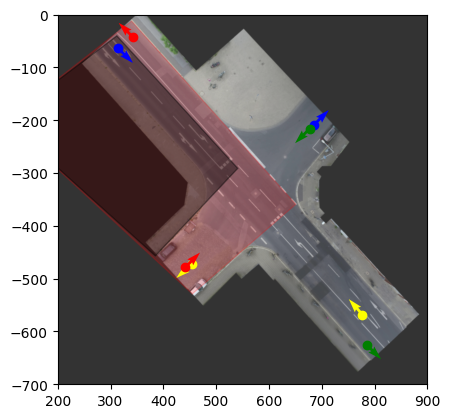

In [13]:
fig, ax = plt.subplots()
img   = mpimg.imread(background_filepath)
arrow_length = 5
j = 4
eval(f"Drive_Area_visual_{j}").plot(color = 'r', alpha = 0.2)
for i in range(len(eval(f"not_Drive_Area_visual_{j}"))):
    eval(f"not_Drive_Area_visual_{j}")[i].plot(color = 'black', alpha = 0.4)
plt.imshow(img,alpha = 0.8, extent=[0, img.shape[1], -img.shape[0], 0])
# EV1
plt.scatter(x_EV_1_initial[0]*real_to_image,x_EV_1_initial[1]*real_to_image,color='blue')
plt.quiver(x_EV_1_initial[0]*real_to_image,
           x_EV_1_initial[1]*real_to_image,
           arrow_length*np.cos(x_EV_1_initial[2]),
           arrow_length*np.sin(x_EV_1_initial[2]),
           color='blue')
plt.scatter(Param_1["RefPos"][0]*real_to_image,Param_1["RefPos"][1]*real_to_image,color='blue')
plt.quiver(Param_1["RefPos"][0]*real_to_image,
           Param_1["RefPos"][1]*real_to_image,
           arrow_length*np.cos(Param_1["RefPos"][2]),
           arrow_length*np.sin(Param_1["RefPos"][2]),
           color='blue')
# EV2
plt.scatter(x_EV_2_initial[0]*real_to_image,x_EV_2_initial[1]*real_to_image,color='yellow')
plt.quiver(x_EV_2_initial[0]*real_to_image,
           x_EV_2_initial[1]*real_to_image,
           arrow_length*np.cos(x_EV_2_initial[2]),
           arrow_length*np.sin(x_EV_2_initial[2]),
           color='yellow')
plt.scatter(Param_2["RefPos"][0]*real_to_image,Param_2["RefPos"][1]*real_to_image,color='yellow')
plt.quiver(Param_2["RefPos"][0]*real_to_image,
           Param_2["RefPos"][1]*real_to_image,
           arrow_length*np.cos(Param_2["RefPos"][2]),
           arrow_length*np.sin(Param_2["RefPos"][2]),
           color='yellow')
# EV3
plt.scatter(x_EV_3_initial[0]*real_to_image,x_EV_3_initial[1]*real_to_image,color='green')
plt.quiver(x_EV_3_initial[0]*real_to_image,
           x_EV_3_initial[1]*real_to_image,
           arrow_length*np.cos(x_EV_3_initial[2]),
           arrow_length*np.sin(x_EV_3_initial[2]),
           color='green')
plt.scatter(Param_3["RefPos"][0]*real_to_image,Param_3["RefPos"][1]*real_to_image,color='green')
plt.quiver(Param_3["RefPos"][0]*real_to_image,
           Param_3["RefPos"][1]*real_to_image,
           arrow_length*np.cos(Param_3["RefPos"][2]),
           arrow_length*np.sin(Param_3["RefPos"][2]),
           color='green')
# EV4
plt.scatter(x_EV_4_initial[0]*real_to_image,x_EV_4_initial[1]*real_to_image,color='red')
plt.quiver(x_EV_4_initial[0]*real_to_image,
           x_EV_4_initial[1]*real_to_image,
           arrow_length*np.cos(x_EV_4_initial[2]),
           arrow_length*np.sin(x_EV_4_initial[2]),
           color='red')
plt.scatter(Param_4["RefPos"][0]*real_to_image,Param_4["RefPos"][1]*real_to_image,color='red')
plt.quiver(Param_4["RefPos"][0]*real_to_image,
           Param_4["RefPos"][1]*real_to_image,
           arrow_length*np.cos(Param_4["RefPos"][2]),
           arrow_length*np.sin(Param_4["RefPos"][2]),
           color='red')
ax.set_xlim([x_lim_0,x_lim_1])
ax.set_ylim([-y_lim_0,-y_lim_1])
plt.show()

In [14]:
# #test mpc
# N_Sam = 90
# test_polytope_1 = polytope_estimation_OR(Param_1)
# State_EV_1_R     = np.zeros((5, N_Sam+1))
# State_EV_1_R[:, 0] = x_EV_1_initial
# X_EV_1_Planning_R = list( )
# X_EV_1_Planning_R.append(x_EV_1_initial[0:2].reshape(2,1))

# test_polytope_2 = polytope_estimation_OR(Param_2)
# State_EV_2_R     = np.zeros((5, N_Sam+1))
# State_EV_2_R[:, 0] = x_EV_2_initial
# X_EV_2_Planning_R = list( )
# X_EV_2_Planning_R.append(x_EV_2_initial[0:2].reshape(2,1))

# test_polytope_3 = polytope_estimation_OR(Param_3)
# State_EV_3_R     = np.zeros((5, N_Sam+1))
# State_EV_3_R[:, 0] = x_EV_3_initial
# X_EV_3_Planning_R = list( )
# X_EV_3_Planning_R.append(x_EV_3_initial[0:2].reshape(2,1))

# test_polytope_4 = polytope_estimation_OR(Param_4)
# State_EV_4_R     = np.zeros((5, N_Sam+1))
# State_EV_4_R[:, 0] = x_EV_4_initial
# X_EV_4_Planning_R = list( )
# X_EV_4_Planning_R.append(x_EV_4_initial[0:2].reshape(2,1))

# fig, ax = plt.subplots()
# img   = mpimg.imread(background_filepath)

# half_width_sv = real_to_image*sv_width / 2
# half_length_sv = real_to_image*sv_length / 2
# i = 0

# pbar = tqdm(range(N_Sam))
# for i in pbar:
#     pbar.set_description(f"Step {i}")
#     EV_1_phi = State_EV_1_R[2, i]
#     EV_1_acc = np.array([State_EV_1_R[4, i]*np.cos(EV_1_phi),State_EV_1_R[4, i]*np.sin(EV_1_phi)])
#     EV_1_pos = np.array([State_EV_1_R[0, i],State_EV_1_R[1, i]])
#     EV_1_vel = np.array([State_EV_1_R[3, i]*np.cos(EV_1_phi),State_EV_1_R[3, i]*np.sin(EV_1_phi)])
#     EV_2_phi = State_EV_2_R[2, i]
#     EV_2_acc = np.array([State_EV_2_R[4, i]*np.cos(EV_2_phi),State_EV_2_R[4, i]*np.sin(EV_2_phi)])
#     EV_2_pos = np.array([State_EV_2_R[0, i],State_EV_2_R[1, i]])
#     EV_2_vel = np.array([State_EV_2_R[3, i]*np.cos(EV_2_phi),State_EV_2_R[3, i]*np.sin(EV_2_phi)])
#     EV_3_phi = State_EV_3_R[2, i]
#     EV_3_acc = np.array([State_EV_3_R[4, i]*np.cos(EV_3_phi),State_EV_3_R[4, i]*np.sin(EV_3_phi)])
#     EV_3_pos = np.array([State_EV_3_R[0, i],State_EV_3_R[1, i]])
#     EV_3_vel = np.array([State_EV_3_R[3, i]*np.cos(EV_3_phi),State_EV_3_R[3, i]*np.sin(EV_3_phi)])
#     EV_4_phi = State_EV_4_R[2, i]
#     EV_4_acc = np.array([State_EV_4_R[4, i]*np.cos(EV_4_phi),State_EV_4_R[4, i]*np.sin(EV_4_phi)])
#     EV_4_pos = np.array([State_EV_4_R[0, i],State_EV_4_R[1, i]])
#     EV_4_vel = np.array([State_EV_4_R[3, i]*np.cos(EV_4_phi),State_EV_4_R[3, i]*np.sin(EV_4_phi)])


#     #   U_R: input, trajectory_planning_k: predicted EV, J_R:cost, Occupancy_SV_aug_R:Occupancy
#     U_R_1, trajectory_planning_k_1, J_R_1, Occupancy_SV_aug_R1 = test_polytope_1.Return(np.vstack((EV_2_acc, EV_3_acc, EV_4_acc)).reshape(3,2,1), 
#                                                                                                        np.vstack((EV_2_pos, EV_3_pos, EV_4_pos)).reshape(3,2,1), 
#                                                                                                        np.vstack((EV_2_vel, EV_3_vel, EV_4_vel)).reshape(3,2,1), 
#                                                                                                        State_EV_1_R[:, i])
#     U_R_2, trajectory_planning_k_2, J_R_2, Occupancy_SV_aug_R2 = test_polytope_2.Return(np.vstack((EV_1_acc, EV_3_acc, EV_4_acc)).reshape(3,2,1), 
#                                                                                                        np.vstack((EV_1_pos, EV_3_pos, EV_4_pos)).reshape(3,2,1), 
#                                                                                                        np.vstack((EV_1_vel, EV_3_vel, EV_4_vel)).reshape(3,2,1), 
#                                                                                                        State_EV_2_R[:, i])
#     U_R_3, trajectory_planning_k_3, J_R_3, Occupancy_SV_aug_R3 = test_polytope_3.Return(np.vstack((EV_1_acc, EV_2_acc, EV_4_acc)).reshape(3,2,1), 
#                                                                                                        np.vstack((EV_1_pos, EV_2_pos, EV_4_pos)).reshape(3,2,1), 
#                                                                                                        np.vstack((EV_1_vel, EV_2_vel, EV_4_vel)).reshape(3,2,1), 
#                                                                                                        State_EV_3_R[:, i])
#     U_R_4, trajectory_planning_k_4, J_R_4, Occupancy_SV_aug_R4 = test_polytope_4.Return(np.vstack((EV_1_acc, EV_2_acc, EV_3_acc)).reshape(3,2,1), 
#                                                                                                        np.vstack((EV_1_pos, EV_2_pos, EV_3_pos)).reshape(3,2,1), 
#                                                                                                        np.vstack((EV_1_vel, EV_2_vel, EV_3_vel)).reshape(3,2,1), 
#                                                                                                        State_EV_4_R[:, i])

#     X_EV_1_Planning_R.append(trajectory_planning_k_1[0:2,1].reshape(2,1))
#     State_EV_1_R[:, i + 1] = trajectory_planning_k_1[:, 1]
#     X_EV_2_Planning_R.append(trajectory_planning_k_2[0:2,1].reshape(2,1))
#     State_EV_2_R[:, i + 1] = trajectory_planning_k_2[:, 1]
#     X_EV_3_Planning_R.append(trajectory_planning_k_3[0:2,1].reshape(2,1))
#     State_EV_3_R[:, i + 1] = trajectory_planning_k_3[:, 1]
#     X_EV_4_Planning_R.append(trajectory_planning_k_4[0:2,1].reshape(2,1))
#     State_EV_4_R[:, i + 1] = trajectory_planning_k_4[:, 1]
    
#     if i % 2 == 0:
#         corners_ev = np.array([
#             [-half_length_sv, -half_width_sv],
#             [half_length_sv, -half_width_sv],
#             [half_length_sv, half_width_sv],
#             [-half_length_sv, half_width_sv]
#         ])

#         rad_yaw_ev_1 = trajectory_planning_k_1[2,1]
#         rotation_matrix_ev_1 = np.array([
#                 [np.cos(rad_yaw_ev_1), -np.sin(rad_yaw_ev_1)],
#                 [np.sin(rad_yaw_ev_1),  np.cos(rad_yaw_ev_1)]
#             ])
#         rotated_corners_ev = corners_ev.reshape(4,2) @ rotation_matrix_ev_1.T
#         rotated_corners_ev[:, 0] += State_EV_1_R[0, i+1]*real_to_image
#         rotated_corners_ev[:, 1] += State_EV_1_R[1, i+1]*real_to_image
#         rotated_corners_ev = np.vstack([rotated_corners_ev, rotated_corners_ev[0]])
#         plt.plot(rotated_corners_ev[:, 0], rotated_corners_ev[:, 1], 'b-')

#         rad_yaw_ev_2 = trajectory_planning_k_2[2,1]
#         rotation_matrix_ev_2 = np.array([
#                 [np.cos(rad_yaw_ev_2), -np.sin(rad_yaw_ev_2)],
#                 [np.sin(rad_yaw_ev_2),  np.cos(rad_yaw_ev_2)]
#             ])
#         rotated_corners_ev = corners_ev.reshape(4,2) @ rotation_matrix_ev_2.T
#         rotated_corners_ev[:, 0] += State_EV_2_R[0, i+1]*real_to_image
#         rotated_corners_ev[:, 1] += State_EV_2_R[1, i+1]*real_to_image
#         rotated_corners_ev = np.vstack([rotated_corners_ev, rotated_corners_ev[0]])
#         plt.plot(rotated_corners_ev[:, 0], rotated_corners_ev[:, 1], 'g-')

#         rad_yaw_ev_3 = trajectory_planning_k_3[2,1]
#         rotation_matrix_ev_3 = np.array([
#                 [np.cos(rad_yaw_ev_3), -np.sin(rad_yaw_ev_3)],
#                 [np.sin(rad_yaw_ev_3),  np.cos(rad_yaw_ev_3)]
#             ])
#         rotated_corners_ev = corners_ev.reshape(4,2) @ rotation_matrix_ev_3.T
#         rotated_corners_ev[:, 0] += State_EV_3_R[0, i+1]*real_to_image
#         rotated_corners_ev[:, 1] += State_EV_3_R[1, i+1]*real_to_image
#         rotated_corners_ev = np.vstack([rotated_corners_ev, rotated_corners_ev[0]])
#         plt.plot(rotated_corners_ev[:, 0], rotated_corners_ev[:, 1], 'r-')

#         rad_yaw_ev_4 = trajectory_planning_k_4[2,1]
#         rotation_matrix_ev_4 = np.array([
#                 [np.cos(rad_yaw_ev_4), -np.sin(rad_yaw_ev_4)],
#                 [np.sin(rad_yaw_ev_4),  np.cos(rad_yaw_ev_4)]
#             ])
#         rotated_corners_ev = corners_ev.reshape(4,2) @ rotation_matrix_ev_4.T
#         rotated_corners_ev[:, 0] += State_EV_4_R[0, i+1]*real_to_image
#         rotated_corners_ev[:, 1] += State_EV_4_R[1, i+1]*real_to_image
#         rotated_corners_ev = np.vstack([rotated_corners_ev, rotated_corners_ev[0]])
#         plt.plot(rotated_corners_ev[:, 0], rotated_corners_ev[:, 1], 'y-')

#         # for j in range(Param_1["N"]):
#         #     occupancy = Polytope(Occupancy_SV_aug_R1[0][j].A, Occupancy_SV_aug_R1[0][j].b*real_to_image)
#         #     occupancy.plot(color = 'g', alpha = 0.1)
#         #     occupancy = Polytope(Occupancy_SV_aug_R1[1][j].A, Occupancy_SV_aug_R1[1][j].b*real_to_image)
#         #     occupancy.plot(color = 'r', alpha = 0.1)
#         #     occupancy = Polytope(Occupancy_SV_aug_R2[0][j].A, Occupancy_SV_aug_R2[0][j].b*real_to_image)
#         #     occupancy.plot(color = 'b', alpha = 0.1)
#         #     occupancy = Polytope(Occupancy_SV_aug_R2[2][j].A, Occupancy_SV_aug_R2[0][j].b*real_to_image)
#         #     occupancy.plot(color = 'y', alpha = 0.1)

# plt.imshow(img,alpha = 0.8, extent=[0, img.shape[1], -img.shape[0], 0])
# # plt.plot(State_EV_1_R[0]*real_to_image, State_EV_1_R[1]*real_to_image)
# # plt.plot(State_EV_2_R[0]*real_to_image, State_EV_2_R[1]*real_to_image)
# # plt.plot(State_EV_3_R[0]*real_to_image, State_EV_3_R[1]*real_to_image)
# # plt.plot(State_EV_4_R[0]*real_to_image, State_EV_4_R[1]*real_to_image)
# ax.set_xlim([x_lim_0,x_lim_1])
# ax.set_ylim([-y_lim_0,-y_lim_1])
# plt.show()


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



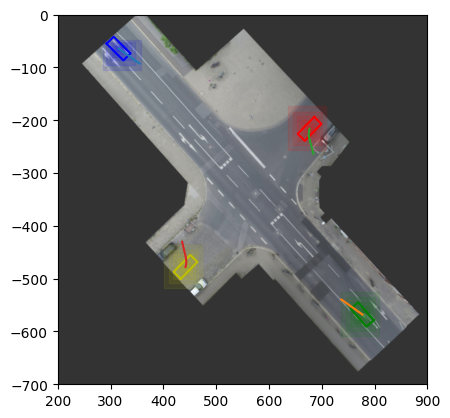

In [15]:
#test mpc
N_Sam = 70
test_polytope_1 = polytope_estimation_OR(Param_1)
State_EV_1_R     = np.zeros((5, N_Sam+1))
State_EV_1_R[:, 0] = x_EV_1_initial
X_EV_1_Planning_R = list()
X_EV_1_Planning_R.append(x_EV_1_initial[0:2].reshape(2,1))

test_polytope_2 = polytope_estimation_OR(Param_2)
State_EV_2_R     = np.zeros((5, N_Sam+1))
State_EV_2_R[:, 0] = x_EV_2_initial
X_EV_2_Planning_R = list()
X_EV_2_Planning_R.append(x_EV_2_initial[0:2].reshape(2,1))

test_polytope_3 = polytope_estimation_OR(Param_3)
State_EV_3_R     = np.zeros((5, N_Sam+1))
State_EV_3_R[:, 0] = x_EV_3_initial
X_EV_3_Planning_R = list()
X_EV_3_Planning_R.append(x_EV_3_initial[0:2].reshape(2,1))

test_polytope_4 = polytope_estimation_OR(Param_4)
State_EV_4_R     = np.zeros((5, N_Sam+1))
State_EV_4_R[:, 0] = x_EV_4_initial
X_EV_4_Planning_R = list()
X_EV_4_Planning_R.append(x_EV_4_initial[0:2].reshape(2,1))

fig, ax = plt.subplots()
img = mpimg.imread(background_filepath)

half_width_sv = real_to_image*sv_width / 2
half_length_sv = real_to_image*sv_length / 2

def draw_vehicle(ax, corners, rotation_matrix, position, color):
    rotated_corners = corners.reshape(4,2) @ rotation_matrix.T
    rotated_corners[:, 0] += position[0]
    rotated_corners[:, 1] += position[1]
    rotated_corners = np.vstack([rotated_corners, rotated_corners[0]]) 
    ax.plot(rotated_corners[:, 0], rotated_corners[:, 1], color)

corners_ev = np.array([
    [-half_length_sv, -half_width_sv],
    [half_length_sv, -half_width_sv],
    [half_length_sv, half_width_sv],
    [-half_length_sv, half_width_sv]
])

def update(frame):
    ax.clear()
    ax.imshow(img, alpha=0.8, extent=[0, img.shape[1], -img.shape[0], 0])
    ax.set_xlim([x_lim_0, x_lim_1])
    ax.set_ylim([-y_lim_0, -y_lim_1])
    
    # Calculate states and controls for EV1
    EV_1_phi = State_EV_1_R[2, frame]
    EV_1_acc = np.array([State_EV_1_R[4, frame]*np.cos(EV_1_phi),State_EV_1_R[4, frame]*np.sin(EV_1_phi)])
    EV_1_pos = np.array([State_EV_1_R[0, frame],State_EV_1_R[1, frame]])
    EV_1_vel = np.array([State_EV_1_R[3, frame]*np.cos(EV_1_phi),State_EV_1_R[3, frame]*np.sin(EV_1_phi)])
    
    # Calculate states and controls for EV2
    EV_2_phi = State_EV_2_R[2, frame]
    EV_2_acc = np.array([State_EV_2_R[4, frame]*np.cos(EV_2_phi),State_EV_2_R[4, frame]*np.sin(EV_2_phi)])
    EV_2_pos = np.array([State_EV_2_R[0, frame],State_EV_2_R[1, frame]])
    EV_2_vel = np.array([State_EV_2_R[3, frame]*np.cos(EV_2_phi),State_EV_2_R[3, frame]*np.sin(EV_2_phi)])
    
    # Calculate states and controls for EV3
    EV_3_phi = State_EV_3_R[2, frame]
    EV_3_acc = np.array([State_EV_3_R[4, frame]*np.cos(EV_3_phi),State_EV_3_R[4, frame]*np.sin(EV_3_phi)])
    EV_3_pos = np.array([State_EV_3_R[0, frame],State_EV_3_R[1, frame]])
    EV_3_vel = np.array([State_EV_3_R[3, frame]*np.cos(EV_3_phi),State_EV_3_R[3, frame]*np.sin(EV_3_phi)])

    # Calculate states and controls for EV4
    EV_4_phi = State_EV_4_R[2, frame]
    EV_4_acc = np.array([State_EV_4_R[4, frame]*np.cos(EV_4_phi),State_EV_4_R[4, frame]*np.sin(EV_4_phi)])
    EV_4_pos = np.array([State_EV_4_R[0, frame],State_EV_4_R[1, frame]])
    EV_4_vel = np.array([State_EV_4_R[3, frame]*np.cos(EV_4_phi),State_EV_4_R[3, frame]*np.sin(EV_4_phi)])

    # Get trajectory planning for each EV
    U_R_1, trajectory_planning_k_1, J_R_1, Occupancy_SV_aug_R1 = test_polytope_1.Return(np.vstack((EV_2_acc, EV_3_acc, EV_4_acc)).reshape(3,2,1), 
                                                                                                       np.vstack((EV_2_pos, EV_3_pos, EV_4_pos)).reshape(3,2,1), 
                                                                                                       np.vstack((EV_2_vel, EV_3_vel, EV_4_vel)).reshape(3,2,1), 
                                                                                                       State_EV_1_R[:, frame])

    U_R_2, trajectory_planning_k_2, J_R_2, Occupancy_SV_aug_R2 = test_polytope_2.Return(np.vstack((EV_1_acc, EV_3_acc, EV_4_acc)).reshape(3,2,1), 
                                                                                                       np.vstack((EV_1_pos, EV_3_pos, EV_4_pos)).reshape(3,2,1), 
                                                                                                       np.vstack((EV_1_vel, EV_3_vel, EV_4_vel)).reshape(3,2,1), 
                                                                                                       State_EV_2_R[:, frame])

    U_R_3, trajectory_planning_k_3, J_R_3, Occupancy_SV_aug_R3 = test_polytope_3.Return(np.vstack((EV_1_acc, EV_2_acc, EV_4_acc)).reshape(3,2,1), 
                                                                                                       np.vstack((EV_1_pos, EV_2_pos, EV_4_pos)).reshape(3,2,1), 
                                                                                                       np.vstack((EV_1_vel, EV_2_vel, EV_4_vel)).reshape(3,2,1), 
                                                                                                       State_EV_3_R[:, frame])

    U_R_4, trajectory_planning_k_4, J_R_4, Occupancy_SV_aug_R4 = test_polytope_4.Return(np.vstack((EV_1_acc, EV_2_acc, EV_3_acc)).reshape(3,2,1), 
                                                                                                       np.vstack((EV_1_pos, EV_2_pos, EV_3_pos)).reshape(3,2,1), 
                                                                                                       np.vstack((EV_1_vel, EV_2_vel, EV_3_vel)).reshape(3,2,1), 
                                                                                                       State_EV_4_R[:, frame])

    # Update states and planning
    X_EV_1_Planning_R.append(trajectory_planning_k_1[0:2,1].reshape(2,1))
    State_EV_1_R[:, frame + 1] = trajectory_planning_k_1[:, 1]
    X_EV_2_Planning_R.append(trajectory_planning_k_2[0:2,1].reshape(2,1))
    State_EV_2_R[:, frame + 1] = trajectory_planning_k_2[:, 1]
    X_EV_3_Planning_R.append(trajectory_planning_k_3[0:2,1].reshape(2,1))
    State_EV_3_R[:, frame + 1] = trajectory_planning_k_3[:, 1]
    X_EV_4_Planning_R.append(trajectory_planning_k_4[0:2,1].reshape(2,1))
    State_EV_4_R[:, frame + 1] = trajectory_planning_k_4[:, 1]

    # Draw vehicles
    # EV1
    rad_yaw_ev_1 = trajectory_planning_k_1[2,1]
    rotation_matrix_ev_1 = np.array([
        [np.cos(rad_yaw_ev_1), -np.sin(rad_yaw_ev_1)],
        [np.sin(rad_yaw_ev_1), np.cos(rad_yaw_ev_1)]
    ])
    draw_vehicle(ax, corners_ev, rotation_matrix_ev_1, 
                [State_EV_1_R[0, frame+1]*real_to_image, State_EV_1_R[1, frame+1]*real_to_image], 'b-')

    # EV2
    rad_yaw_ev_2 = trajectory_planning_k_2[2,1]
    rotation_matrix_ev_2 = np.array([
        [np.cos(rad_yaw_ev_2), -np.sin(rad_yaw_ev_2)],
        [np.sin(rad_yaw_ev_2), np.cos(rad_yaw_ev_2)]
    ])
    draw_vehicle(ax, corners_ev, rotation_matrix_ev_2, 
                [State_EV_2_R[0, frame+1]*real_to_image, State_EV_2_R[1, frame+1]*real_to_image], 'g-')

    # EV3
    rad_yaw_ev_3 = trajectory_planning_k_3[2,1]
    rotation_matrix_ev_3 = np.array([
        [np.cos(rad_yaw_ev_3), -np.sin(rad_yaw_ev_3)],
        [np.sin(rad_yaw_ev_3), np.cos(rad_yaw_ev_3)]
    ])
    draw_vehicle(ax, corners_ev, rotation_matrix_ev_3, 
                [State_EV_3_R[0, frame+1]*real_to_image, State_EV_3_R[1, frame+1]*real_to_image], 'r-')
    
    # EV4
    rad_yaw_ev_4 = trajectory_planning_k_4[2,1]
    rotation_matrix_ev_4 = np.array([
        [np.cos(rad_yaw_ev_4), -np.sin(rad_yaw_ev_4)],
        [np.sin(rad_yaw_ev_4), np.cos(rad_yaw_ev_4)]
    ])
    draw_vehicle(ax, corners_ev, rotation_matrix_ev_4, 
                [State_EV_4_R[0, frame+1]*real_to_image, State_EV_4_R[1, frame+1]*real_to_image], 'y-')

    # Plot trajectories
    ax.plot(trajectory_planning_k_1[0]*real_to_image, trajectory_planning_k_1[1]*real_to_image)
    ax.plot(trajectory_planning_k_2[0]*real_to_image, trajectory_planning_k_2[1]*real_to_image)
    ax.plot(trajectory_planning_k_3[0]*real_to_image, trajectory_planning_k_3[1]*real_to_image)
    ax.plot(trajectory_planning_k_4[0]*real_to_image, trajectory_planning_k_4[1]*real_to_image)

    for j in range(Param_1["N"]):
        occupancy = Polytope(Occupancy_SV_aug_R1[0][j].A, Occupancy_SV_aug_R1[0][j].b*real_to_image)
        occupancy.plot(color = 'g', alpha = 0.1)
        occupancy = Polytope(Occupancy_SV_aug_R1[1][j].A, Occupancy_SV_aug_R1[1][j].b*real_to_image)
        occupancy.plot(color = 'r', alpha = 0.1)
        occupancy = Polytope(Occupancy_SV_aug_R2[0][j].A, Occupancy_SV_aug_R2[0][j].b*real_to_image)
        occupancy.plot(color = 'b', alpha = 0.1)
        occupancy = Polytope(Occupancy_SV_aug_R1[2][j].A, Occupancy_SV_aug_R1[2][j].b*real_to_image)
        occupancy.plot(color = 'y', alpha = 0.1)

frame_length = N_Sam
ani = FuncAnimation(fig, update, frames=range(0, frame_length), interval=100, repeat=False)
#plt.show()
ani.save("../../videos/inD_multiagent/4agents_risk2_simulation2.mp4", writer='ffmpeg', fps=15)

In [18]:
from IPython.display import Video

# Specify the full file path
video_path = "../../videos/inD_multiagent/4agents_risk2_simulation2.mp4"

# Display the video
Video(video_path, embed=True)

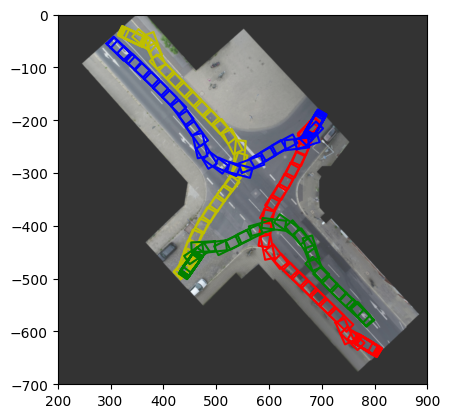

In [17]:
# Create figure for trajectory plot
fig, ax = plt.subplots()
img = mpimg.imread(background_filepath)
ax.imshow(img, alpha=0.8, extent=[0, img.shape[1], -img.shape[0], 0])
ax.set_xlim([x_lim_0, x_lim_1])
ax.set_ylim([-y_lim_0, -y_lim_1])

# Define vehicle drawing function and corners (if not already defined)
half_width_sv = real_to_image*sv_width / 2
half_length_sv = real_to_image*sv_length / 2

def draw_vehicle(ax, corners, rotation_matrix, position, color):
    rotated_corners = corners.reshape(4,2) @ rotation_matrix.T
    rotated_corners[:, 0] += position[0]
    rotated_corners[:, 1] += position[1]
    rotated_corners = np.vstack([rotated_corners, rotated_corners[0]]) 
    ax.plot(rotated_corners[:, 0], rotated_corners[:, 1], color)

corners_ev = np.array([
    [-half_length_sv, -half_width_sv],
    [half_length_sv, -half_width_sv],
    [half_length_sv, half_width_sv],
    [-half_length_sv, half_width_sv]
])

# Plot trajectories using State arrays
# ax.plot(State_EV_1_R[0, :]*real_to_image, State_EV_1_R[1, :]*real_to_image, 'b--', label='EV1 Trajectory', linewidth=2, alpha=0.7)
# ax.plot(State_EV_2_R[0, :]*real_to_image, State_EV_2_R[1, :]*real_to_image, 'g--', label='EV2 Trajectory', linewidth=2, alpha=0.7)
# ax.plot(State_EV_3_R[0, :]*real_to_image, State_EV_3_R[1, :]*real_to_image, 'r--', label='EV3 Trajectory', linewidth=2, alpha=0.7)
# ax.plot(State_EV_4_R[0, :]*real_to_image, State_EV_4_R[1, :]*real_to_image, 'y--', label='EV4 Trajectory', linewidth=2, alpha=0.7)

# Draw vehicles at regular intervals
for i in range(0, N_Sam, 2):  # Draw every 5th vehicle position
    # Draw EV1
    rad_yaw_ev_1 = State_EV_1_R[2, i]  # Get yaw from state
    rotation_matrix_ev_1 = np.array([
        [np.cos(rad_yaw_ev_1), -np.sin(rad_yaw_ev_1)],
        [np.sin(rad_yaw_ev_1), np.cos(rad_yaw_ev_1)]
    ])
    draw_vehicle(ax, corners_ev, rotation_matrix_ev_1, 
                [State_EV_1_R[0, i]*real_to_image, State_EV_1_R[1, i]*real_to_image], 'b-')

    # Draw EV2
    rad_yaw_ev_2 = State_EV_2_R[2, i]  # Get yaw from state
    rotation_matrix_ev_2 = np.array([
        [np.cos(rad_yaw_ev_2), -np.sin(rad_yaw_ev_2)],
        [np.sin(rad_yaw_ev_2), np.cos(rad_yaw_ev_2)]
    ])
    draw_vehicle(ax, corners_ev, rotation_matrix_ev_2, 
                [State_EV_2_R[0, i]*real_to_image, State_EV_2_R[1, i]*real_to_image], 'g-')

    # Draw EV3
    rad_yaw_ev_3 = State_EV_3_R[2, i]  # Get yaw from state
    rotation_matrix_ev_3 = np.array([
        [np.cos(rad_yaw_ev_3), -np.sin(rad_yaw_ev_3)],
        [np.sin(rad_yaw_ev_3), np.cos(rad_yaw_ev_3)]
    ])
    draw_vehicle(ax, corners_ev, rotation_matrix_ev_3, 
                [State_EV_3_R[0, i]*real_to_image, State_EV_3_R[1, i]*real_to_image], 'r-')

    # Draw EV4
    rad_yaw_ev_4 = State_EV_4_R[2, i]  # Get yaw from state
    rotation_matrix_ev_4 = np.array([
        [np.cos(rad_yaw_ev_4), -np.sin(rad_yaw_ev_4)],
        [np.sin(rad_yaw_ev_4), np.cos(rad_yaw_ev_4)]
    ])
    draw_vehicle(ax, corners_ev, rotation_matrix_ev_4, 
                [State_EV_4_R[0, i]*real_to_image, State_EV_4_R[1, i]*real_to_image], 'y-')

# Add legend

# Save the trajectory plot
plt.show()